In [59]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline 

In [60]:
# Actual wins from July to Nov, health and usage as of June
#wins = pd.read_csv(r'C:\Users\varamase\Documents\DataStreams\YellowGreenAnalysis\CustomerWins.csv')
#wins = wins[["TPID", "Count of TPID"]]
#wins = wins.rename(columns={"TPID": "TPId", "Count of TPID": "FTWin"})
df = pd.read_csv(r'C:\Users\varamase\Documents\DataStreams\YellowGreenAnalysis\H1Wins.csv')
df = df.fillna(0)

In [12]:
#wins.head()

,TPId,FTWin
0,1459839,1
1,884375,1
2,1741880,1
3,668753,1
4,2859014,1


In [4]:
# df = df.merge(wins, how = "left", on = "TPId")
# df = df.fillna(0)
#df.to_csv("C:\\Users\\varamase\\Documents\\DataStreams\\YellowGreenAnalysis\\Sample.csv", sep=',')

In [61]:
# Number of Wins in the July to Nov timeframe
sum(df['FTWin'] == 1)

486

In [62]:
df.head()

,TPID,Recommendation,Propensity,FTWin,IsS2500,Exo_Score,Odsp_Score,OfficeMobile_Score,Edge_Score,Aadp_Score,...,PowerBIM365Rev,PowerBINonM365Rev,WindowsCoreM365Rev,WindowsCoreNonM365E3Rev,WindowsCoreNonM365EnterpriseRev,WindowsDeviceLicensingRev,WindowsE5M365Rev,WindowsE5NonM365Rev,AreaName,Industry
0,523626,Account shows high propensity for ME5 upsell i...,49,0,FALSE,Green,Green,Yellow,Red - Low usage,Green,...,35168.725,539003.0622,0,0,0,0,125684.9506,9861.3607,Western Europe,Banking
1,523924,Account shows low propensity for ME5 upsell in...,7,0,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,...,0,0,0,0,0,0,0,0,UK,Capital Markets
2,646470,Account shows low propensity for ME5 upsell in...,7,0,FALSE,Green,Yellow,Green,Red - Low usage,Green,...,62552.286,8684.9584,0,0,0,0,165597.5077,0,United States,Real Estate
3,669088,Account shows high propensity for ME5 upsell i...,53,0,FALSE,Green,Green,Green,Red - Low usage,Red - Low usage,...,0,21420,0,0,0,0,0,0,United States,Real Estate
4,942760,Account shows low propensity for ME5 upsell in...,17,0,FALSE,Red - Low ownership,Red - Low ownership,Green,Red - Low ownership,Red - Low ownership,...,0,0,0,0,0,0,0,0,Western Europe,Health Provider


In [63]:
# actual FT Wins as of 11/19/2020

df.loc[(df['FTWin']==0), 'FTWin'] = 'No Upsell'
df.loc[(df['FTWin']==1), 'FTWin'] = 'Upsell'

#df_managedyg = df[(df['SegmentGroup']=='Enterprise') | (df['SegmentGroup']=='SMC Managed')]
#df_managedyg = df[(df['SegmentGroup']=='Enterprise')]
print("Total Enterprise Accounts: {}".format(df.shape[0]))
df_managedyg = df[(df['CustomerHealthScore']=='Yellow') | (df['CustomerHealthScore'] == 'Green')] 
print("Total Enterprise E3 Health Yellow and Green Accounts: {}".format(df_managedyg.shape[0]))
print("Total Enterprise E3 Health Yellow and Green Accounts that upsold: {}".format(df_managedyg[df_managedyg['FTWin']=='Upsell'].shape[0]))
print("Total Enterprise E3 Health Yellow and Green Accounts that did not upsell: {}".format(df_managedyg[df_managedyg['FTWin']=='No Upsell'].shape[0]))

Total Enterprise Accounts: 15331
Total Enterprise E3 Health Yellow and Green Accounts: 5723
Total Enterprise E3 Health Yellow and Green Accounts that upsold: 298
Total Enterprise E3 Health Yellow and Green Accounts that did not upsell: 5425


In [7]:
# df_managed = df[(df['SegmentGroup']=='Enterprise')]
# print(sum(df_managed['FTWin'] == 'Upsell'))


# check1_denom = df_managed[(df_managed['Group1_Score']=='Green') & (df_managed['Group3_Score'] == 'Green')] #237 
# check1_num = check1_denom[(check1_denom['FTWin']=='Upsell')] #16

# print(check1_denom.shape)
# print(check1_num.shape)


# check2_denom = df_managed[(df_managed['Group1_Score']=='Red') & (df_managed['Group3_Score'] == 'Green')]  #3951
# check2_num = check2_denom[(check2_denom['FTWin']=='Upsell')] #153
# print(check2_denom.shape)
# print(check2_num.shape)


# check3_denom = df_managed[(df_managed['Group1_Score']=='Green') & (df_managed['Group3_Score'] == 'Red')] 
# check3_num = check3_denom[(check3_denom['FTWin']=='Upsell')] #153
# print(check3_denom.shape)
# print(check3_num.shape)

# teams_percent1 =  df_managed['TeamsAllUp_MAU_PAU'] <= 0.40
# check4_denom =  df_managed[teams_percent1]
# print(check4_denom.shape)
# check4_num = check4_denom[(check4_denom['FTWin']=='Upsell')] 
# print(check4_num.shape) 
# print(check4_num.shape[0]/check4_denom.shape[0])


#20% - 4%, 5.5%
#30% - 4.5%, 5.5%
#40% - 5%, 5.3%
#50% - 5.1%,5.1%
#60% - 5.3%, 4.9%

523
(4492, 150)
(222, 150)
0.04942119323241318


In [143]:
print(153/3951)
print(16/237)
print(409/8727)

0.0387243735763098
0.06751054852320675
0.04686604789733013


In [64]:
def plot_core(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 1, col_name] = 1
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='FTWin', bins=10, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    # Student's t-test
    dist1 = df[df['FTWin']=='Upsell'][col_name].dropna().tolist()
    dist2 = df[df['FTWin']=='No Upsell'][col_name].dropna().tolist()
    stat, p = ttest_ind(dist1, dist2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 1:
            x.axvline(df[df['FTWin']=='Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='Upsell'][col_name].mean())
        if i == 0:
            x.axvline(df[df['FTWin']=='No Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='No Upsell'][col_name].mean())
            
    return ax

Statistics=0.949, p=0.343
Same distributions (fail to reject H0)
0.7362098070792625
0.7514355686107382


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='EXO Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='EXO Utilization', ylabel='Number of Accounts'>],
      dtype=object)

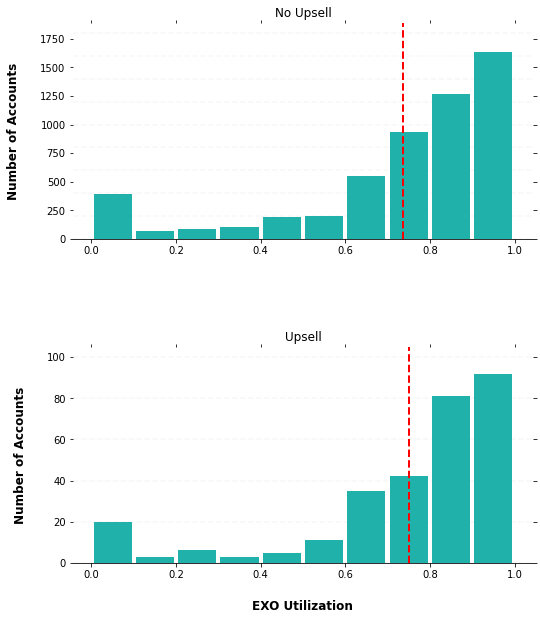

In [65]:
plot_core(df_managedyg, 'EXO_MAU_PAU')

Statistics=0.450, p=0.653
Same distributions (fail to reject H0)
0.4356648484975115
0.44222539408724837


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='ODB Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='ODB Utilization', ylabel='Number of Accounts'>],
      dtype=object)

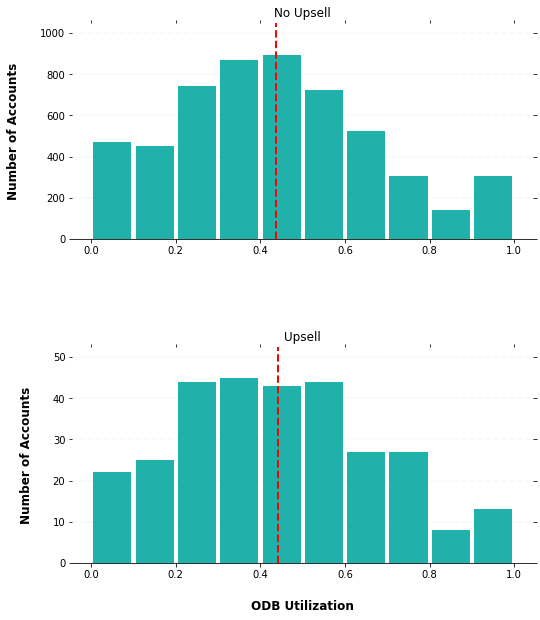

In [67]:
plot_core(df_managedyg, 'ODB_MAU_PAU')

Statistics=2.385, p=0.017
Different distributions (reject H0)
0.5259550617367742
0.5650387052080537


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='SPO Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='SPO Utilization', ylabel='Number of Accounts'>],
      dtype=object)

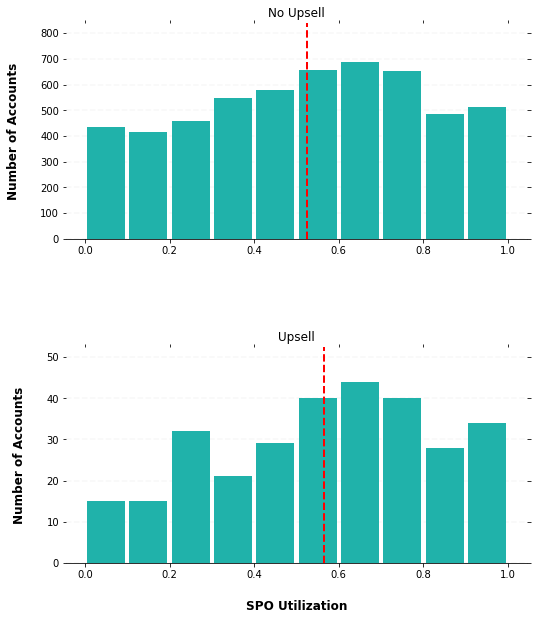

In [68]:
plot_core(df_managedyg, 'SPO_MAU_PAU')

Statistics=1.115, p=0.265
Same distributions (fail to reject H0)
0.5913351907893087
0.6105935692449664


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='TeamsAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='TeamsAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

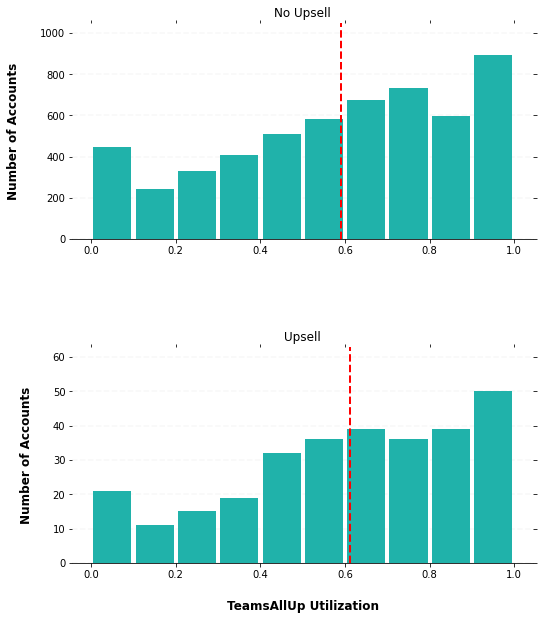

In [69]:
plot_core(df_managedyg, 'TeamsAllUp_MAU_PAU')

Statistics=-0.931, p=0.352
Same distributions (fail to reject H0)
0.28088853469788017
0.26711879167785235


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='TeamsMobile Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='TeamsMobile Utilization', ylabel='Number of Accounts'>],
      dtype=object)

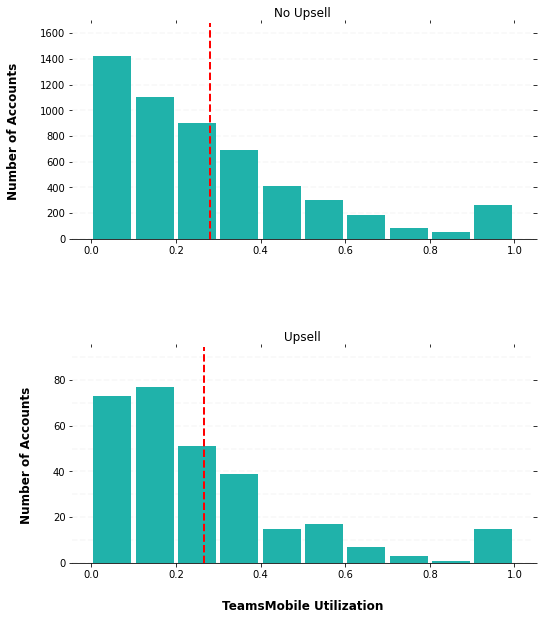

In [70]:
plot_core(df_managedyg, 'TeamsMobile_MAU_PAU')

Statistics=0.900, p=0.368
Same distributions (fail to reject H0)
0.1592344142626728
0.17119443593959732


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='SfB Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='SfB Utilization', ylabel='Number of Accounts'>],
      dtype=object)

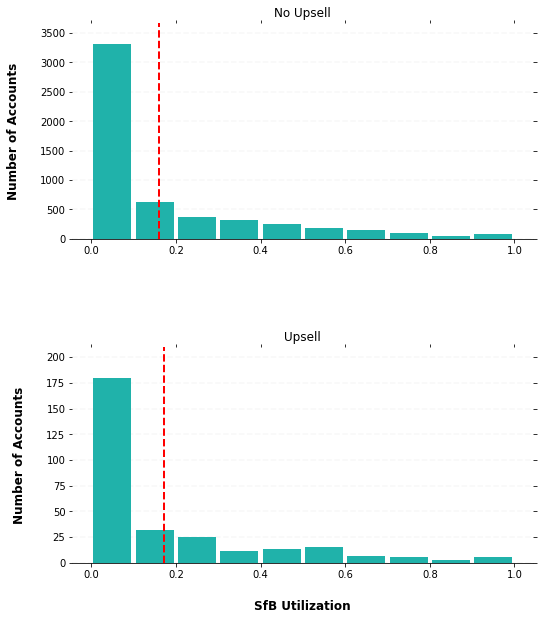

In [44]:
plot_core(df_managedyg, 'SfB_MAU_PAU')

Statistics=-0.258, p=0.797
Same distributions (fail to reject H0)
0.8228190921931797
0.8191745306006711


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='OfficeClientAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='OfficeClientAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

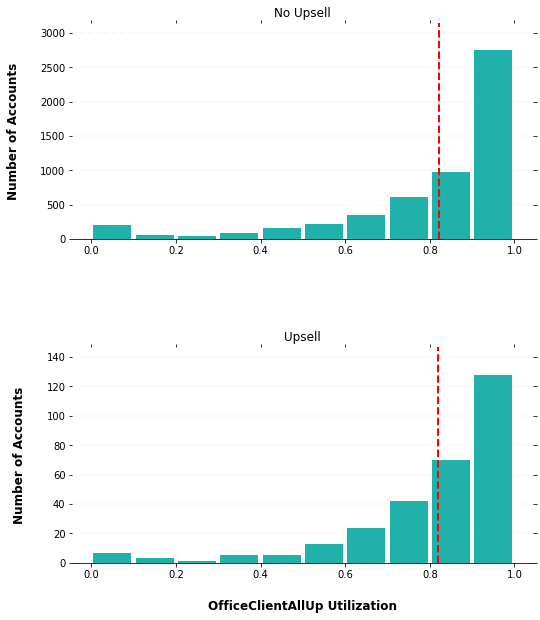

In [71]:
plot_core(df_managedyg, 'OfficeClientAllUp_MAU_PAU')

Statistics=0.022, p=0.982
Same distributions (fail to reject H0)
0.27605856342119817
0.2763061157818792


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='OutlookMobile Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='OutlookMobile Utilization', ylabel='Number of Accounts'>],
      dtype=object)

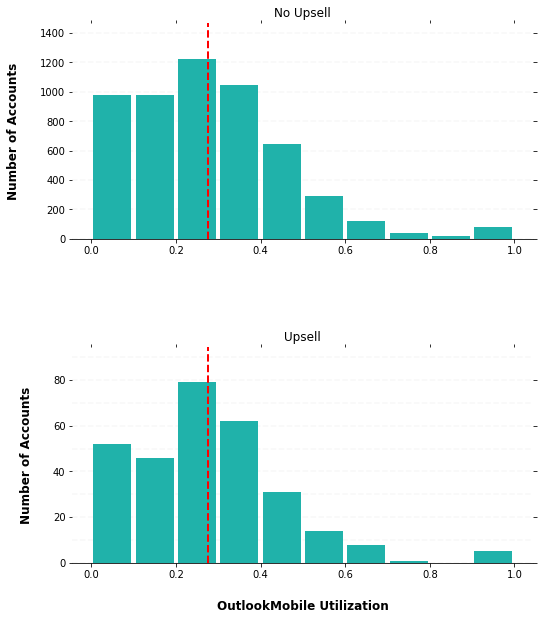

In [72]:
plot_core(df_managedyg, 'OutlookMobile_MAU_PAU')

In [73]:
def plot_sci(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 2, col_name] = 2
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='FTWin', bins=21, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    # Student's t-test
    dist1 = df[df['FTWin']=='Upsell'][col_name].dropna().tolist()
    dist2 = df[df['FTWin']=='No Upsell'][col_name].dropna().tolist()
    stat, p = ttest_ind(dist1, dist2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 1:
            x.axvline(df[df['FTWin']=='Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='Upsell'][col_name].mean())
        if i == 0:
            x.axvline(df[df['FTWin']=='No Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='No Upsell'][col_name].mean())
        
    return ax

Statistics=2.022, p=0.043
Different distributions (reject H0)
0.9519823681179723
1.0242029176879195


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='AADPAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='AADPAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

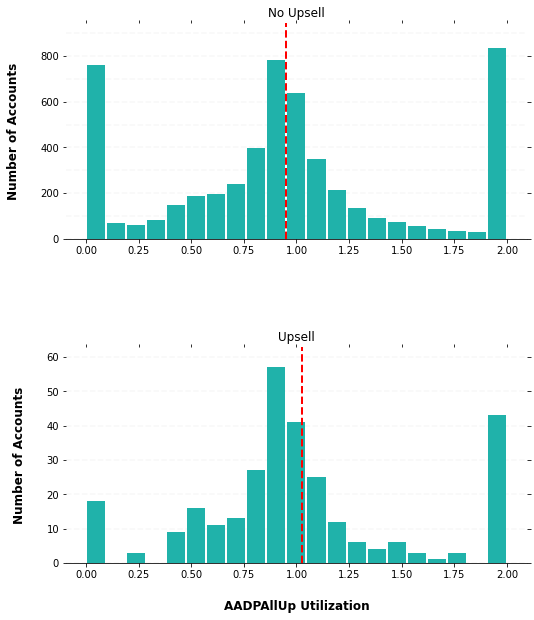

In [74]:
plot_sci(df_managedyg, 'AADPAllUp_MAU_PAU')

Statistics=4.438, p=0.000
Different distributions (reject H0)
0.26199023430746543
0.4174072765973154


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='AADPPremium Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='AADPPremium Utilization', ylabel='Number of Accounts'>],
      dtype=object)

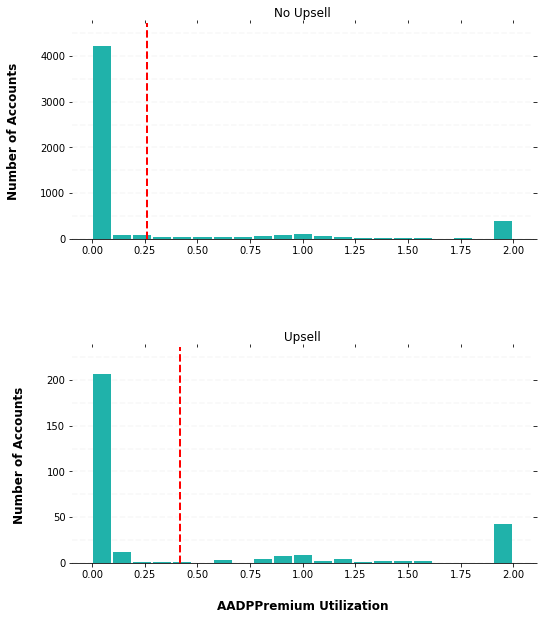

In [75]:
plot_sci(df_managedyg, 'AADPPremium_MAU_PAU')

Statistics=2.515, p=0.012
Different distributions (reject H0)
0.8271520729504147
0.9175420451979865


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='AADP Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='AADP Utilization', ylabel='Number of Accounts'>],
      dtype=object)

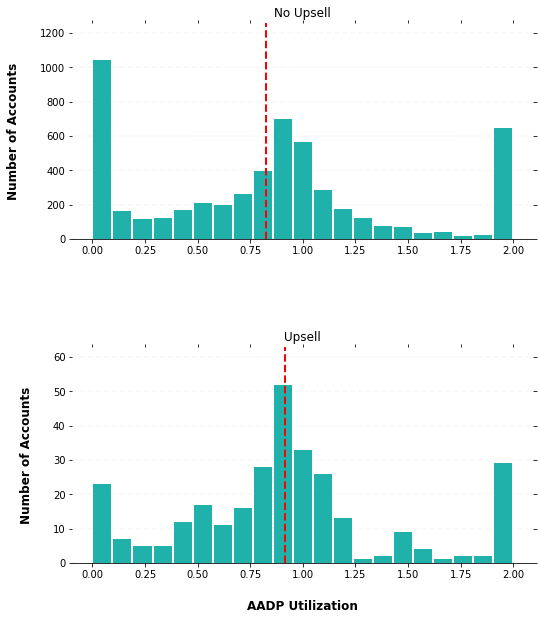

In [77]:
plot_sci(df_managedyg, 'AADP_Incentive_MAU_PAU')

Statistics=3.431, p=0.001
Different distributions (reject H0)
0.39601629726580645
0.4871282946677852


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='IntuneAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='IntuneAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

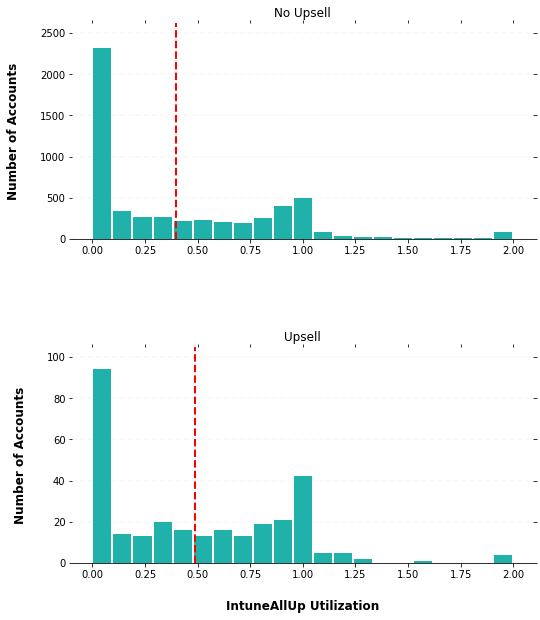

In [78]:
plot_sci(df_managedyg, 'IntuneAllUp_MAU_PAU')

Statistics=-0.491, p=0.623
Same distributions (fail to reject H0)
1.072206190387281
1.050639585909396


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='MIGAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='MIGAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

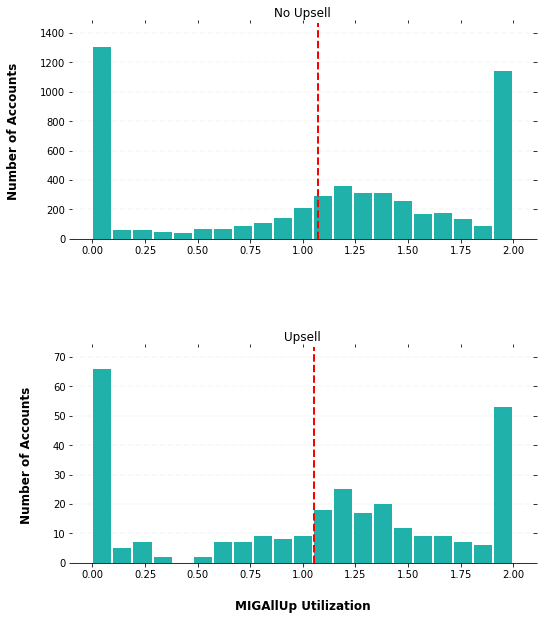

In [51]:
plot_sci(df_managedyg, 'MIGAllUp_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Statistics=1.654, p=0.098
Same distributions (fail to reject H0)
0.23416470996921662
0.2933584611308725


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='MIGPremium Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='MIGPremium Utilization', ylabel='Number of Accounts'>],
      dtype=object)

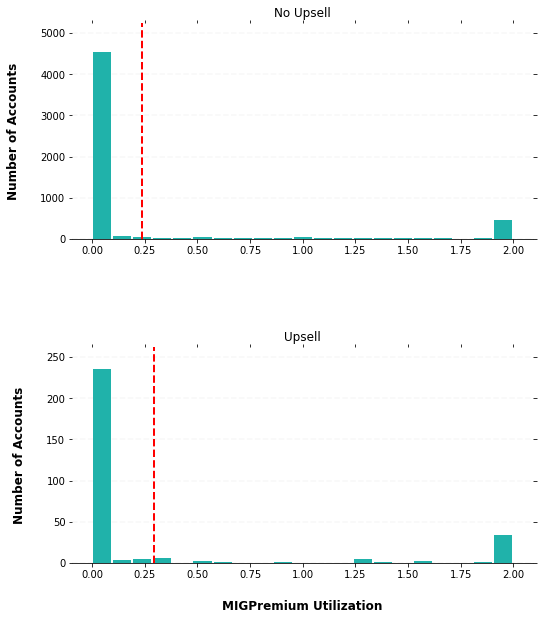

In [79]:
plot_sci(df_managedyg, 'MIGPremium_MAU_PAU')

Statistics=-0.562, p=0.574
Same distributions (fail to reject H0)
0.4265384374573271
0.4093355340771812


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='MIPAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='MIPAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

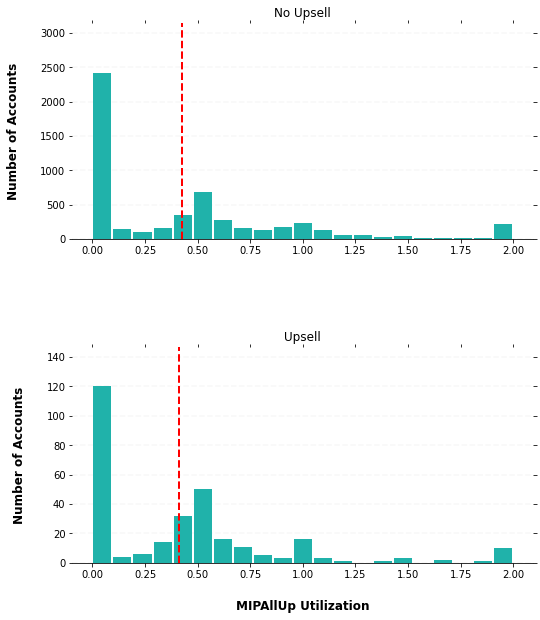

In [81]:
plot_sci(df_managedyg, 'MIPAllUp_MAU_PAU')

Statistics=2.129, p=0.033
Different distributions (reject H0)
0.25296862292442396
0.33140867929865775


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='MIPPremium Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='MIPPremium Utilization', ylabel='Number of Accounts'>],
      dtype=object)

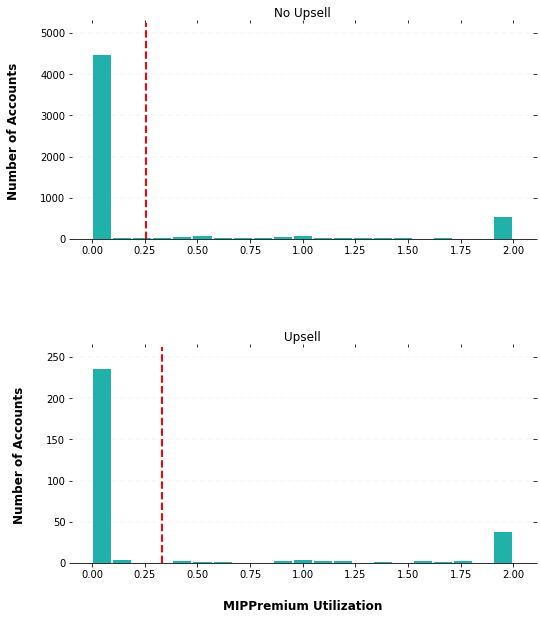

In [54]:
plot_sci(df_managedyg, 'MIPPremium_MAU_PAU')

Statistics=2.455, p=0.014
Different distributions (reject H0)
0.741547253195576
0.8539142442248322


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='OATPAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='OATPAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

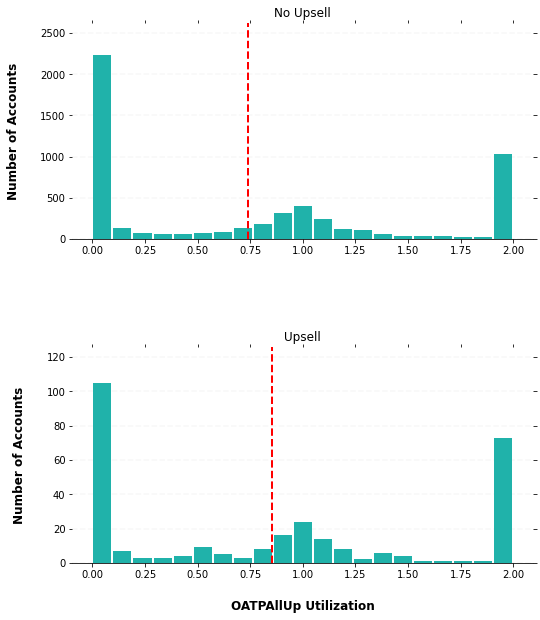

In [83]:
plot_sci(df_managedyg, 'OATPAllUp_MAU_PAU')

Statistics=2.242, p=0.025
Different distributions (reject H0)
0.7183016110790783
0.8340291543758389


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='OATPPremium Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='OATPPremium Utilization', ylabel='Number of Accounts'>],
      dtype=object)

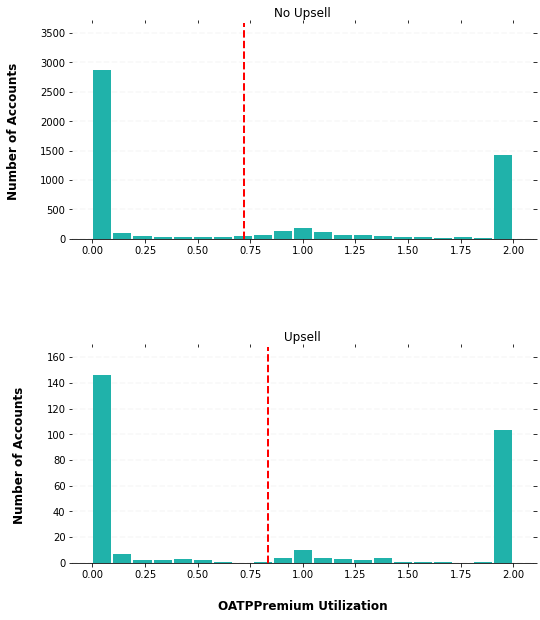

In [84]:
plot_sci(df_managedyg, 'OATPPremium_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Statistics=3.045, p=0.002
Different distributions (reject H0)
0.2004563998191705
0.2965927681979866


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='MDATPAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='MDATPAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

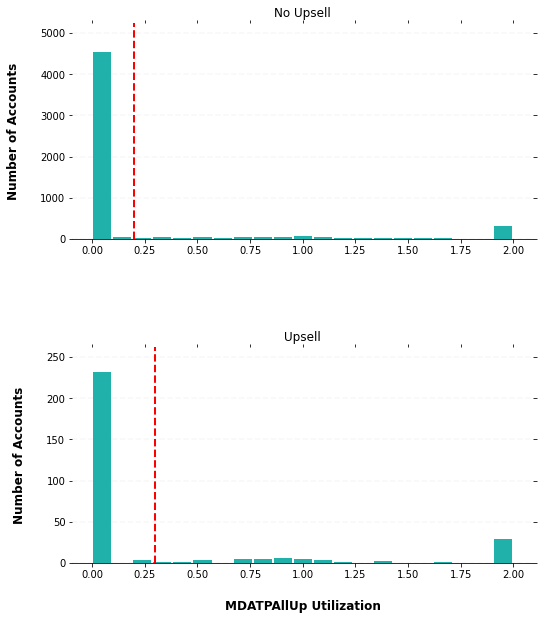

In [57]:
plot_sci(df_managedyg, 'MDATPAllUp_MAU_PAU')

Statistics=1.873, p=0.061
Same distributions (fail to reject H0)
0.6178295195568663
0.7090717192852348


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<AxesSubplot:title={'center':'No Upsell'}, xlabel='MCASAllUp Utilization', ylabel='Number of Accounts'>,
       <AxesSubplot:title={'center':'Upsell'}, xlabel='MCASAllUp Utilization', ylabel='Number of Accounts'>],
      dtype=object)

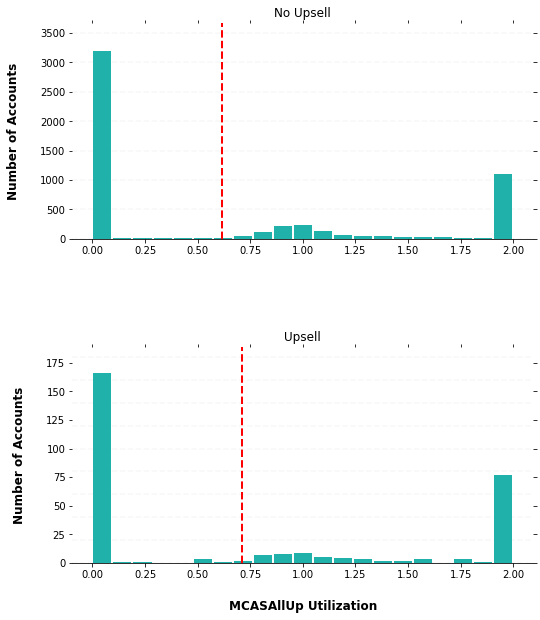

In [58]:
plot_sci(df_managedyg, 'MCASAllUp_MAU_PAU')

In [106]:
# Propensity as of Oct and Usage/Health as of Sep
df_prop = pd.read_csv(r'C:\Users\varamase\Documents\DataStreams\YellowGreenAnalysis\PropensityHealth_10_30_2020.csv')
df_prop = df_prop.fillna(0)

In [107]:
df_prop.head()

,TPId,IsS2500,Exo_Score,Odsp_Score,OfficeMobile_Score,Edge_Score,Aadp_Score,ManagedWin10_Score,Group1_Score,Group2_Score,...,O365E5NonM365Rev,OfficeRev,PowerBIM365Rev,PowerBINonM365Rev,WindowsCoreM365Rev,WindowsCoreNonM365E3Rev,WindowsCoreNonM365EnterpriseRev,WindowsDeviceLicensingRev,WindowsE5M365Rev,WindowsE5NonM365Rev
0,54,True,Red - Low usage,Yellow,Red - Low usage,Red - Low usage,Red - Low usage,Red - Low usage,Yellow,Red,...,70978.386,0.0,0.0,75435.994,0.0,0.0,0.0,0.0,0.0,0.0
1,83,False,Red - Low usage,Green,Red - Low usage,Red - Low usage,Green,Red - Low usage,Green,Red,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,87,True,Green,Green,Green,Red - Low usage,Green,Red - Low usage,Green,Green,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,95,False,Red - Low usage,Red - Low usage,Red - Low usage,Red - Low usage,Red - Low usage,Red - Low usage,Red,Red,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,104,False,Green,Yellow,Red - Low usage,Red - Low usage,Green,Red - Low usage,Green,Red,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
df_prop = df_prop[(df_prop['SegmentGroup']=='Enterprise')]
print("Total Enterprise Accounts: {}".format(df_prop.shape[0]))
df_prop.loc[(df_prop['Recommendation']=='Account shows low propensity for ME5 upsell in the next year') | (df_prop['Recommendation']=='Account shows low propensity for ME5 upsell in the next year CAPPED'), 'Type'] = 'Low Propensity'
df_prop.loc[(df_prop['Recommendation']=='Account shows high propensity for ME5 upsell in the next year') | (df_prop['Recommendation']=='Account shows high propensity for ME5 upsell in the next year CAPPED') | (df_prop['Recommendation']=='Account shows medium propensity for ME5 upsell in the next year') | (df_prop['Recommendation']=='Account shows medium propensity for ME5 upsell in the next year CAPPED'), 'Type'] = 'High or Medium Propensity'
df_yg = df_prop[(df_prop['CustomerHealthScore']=='Yellow') | (df_prop['CustomerHealthScore']=='Green')]
print("Total E3 Health Yellow/Green Accounts: {}".format(df_yg.shape[0]))
df_yg_low = df_yg[df_yg['Type']=='Low Propensity']
print("Total E3 Health Yellow/Green Accounts with L ME5 Upsell Propensity: {}".format(df_yg_low.shape[0]))
df_yg_high = df_yg[df_yg['Type']=='High or Medium Propensity']
print("Total E3 Health Yellow/Green Accounts with H/M ME5 Upsell Propensity: {}".format(df_yg_high.shape[0]))

Total Enterprise Accounts: 10150
Total E3 Health Yellow/Green Accounts: 6105
Total E3 Health Yellow/Green Accounts with L ME5 Upsell Propensity: 3354
Total E3 Health Yellow/Green Accounts with H/M ME5 Upsell Propensity: 2047


In [109]:
def plot_core(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 1, col_name] = 1
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='Type', bins=10, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 0:
            x.axvline(df[df['Type']=='High or Medium Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='High or Medium Propensity'][col_name].mean())
        if i == 1:
            x.axvline(df[df['Type']=='Low Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='Low Propensity'][col_name].mean())
        
    return ax

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.7695642901915007
0.7658274004293378


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B31DB860>,
      dtype=object)

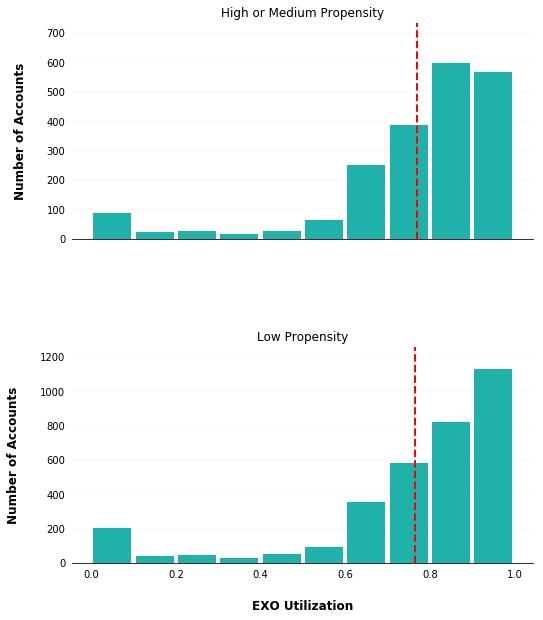

In [110]:
plot_core(df_yg, 'EXO_MAU_PAU')

0.48142175075671734
0.47784282846511567


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001829F68DDD8>,
      dtype=object)

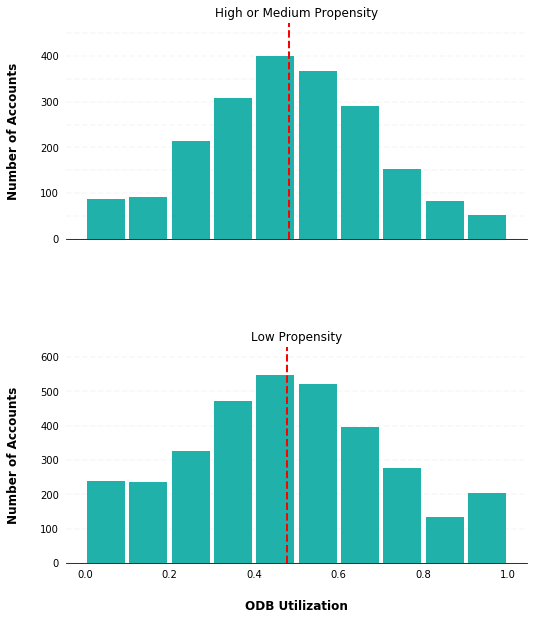

In [111]:
plot_core(df_yg, 'ODB_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.5925415837425501
0.5557535300465108


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001829F5D6DA0>,
      dtype=object)

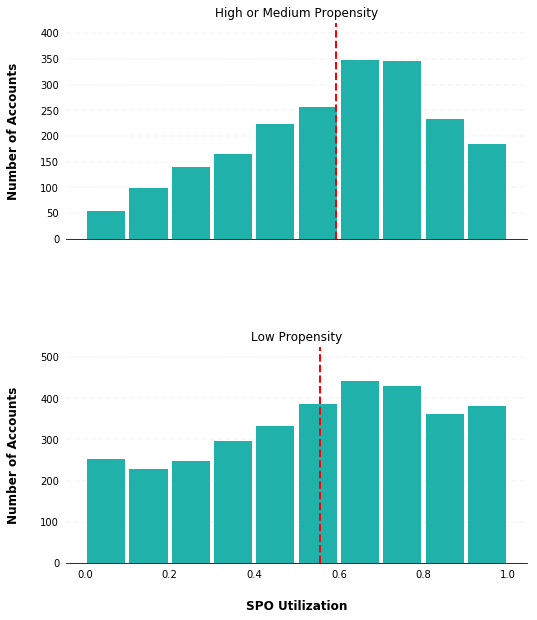

In [112]:
plot_core(df_yg, 'SPO_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.6424726930454318
0.639852890119261


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001829F8C1BE0>,
      dtype=object)

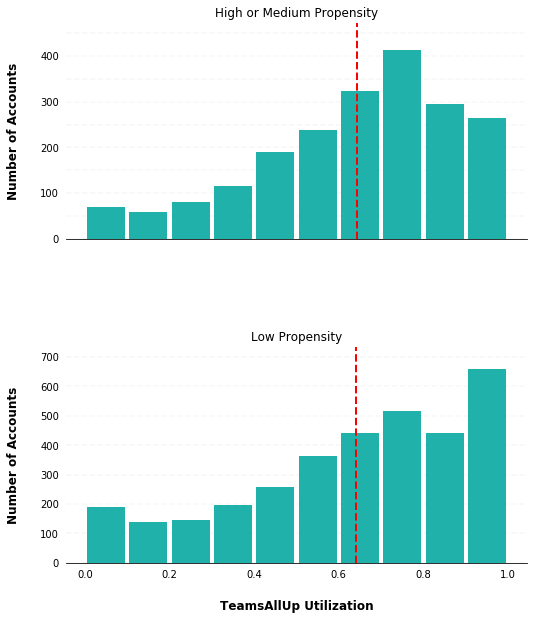

In [113]:
plot_core(df_yg, 'TeamsAllUp_MAU_PAU')

0.2695867597215431
0.30457986072212334


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001829F82BB00>,
      dtype=object)

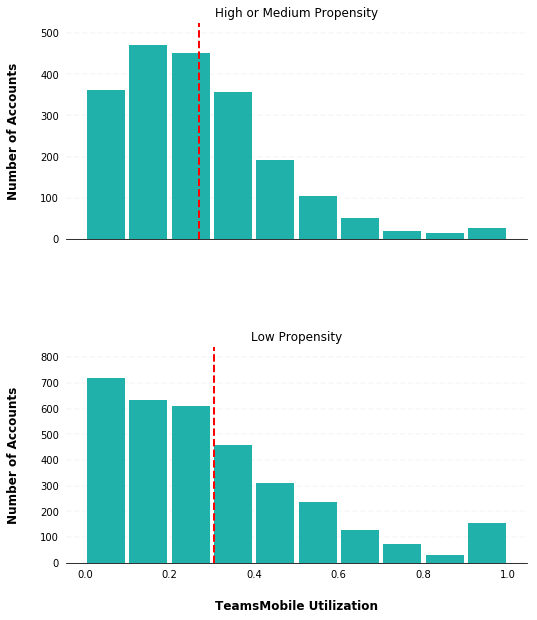

In [114]:
plot_core(df_yg, 'TeamsMobile_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.1311419641680507
0.11651157299403668


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001829FEB0550>,
      dtype=object)

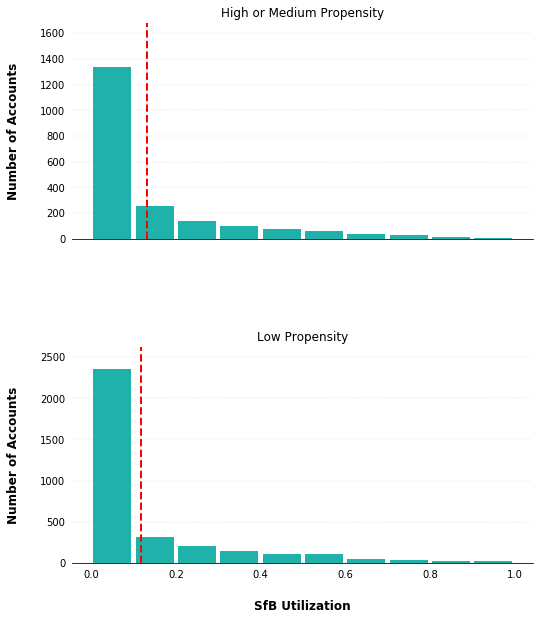

In [69]:
plot_core(df_yg, 'SfB_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.8651091909355159
0.8728429658127596


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182A08EAF98>,
      dtype=object)

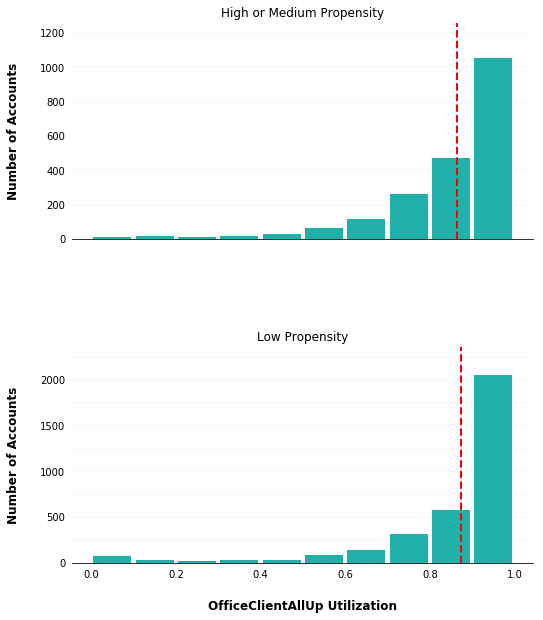

In [70]:
plot_core(df_yg, 'OfficeClientAllUp_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.2724150444181729
0.28670806018664363


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182A03FA7B8>,
      dtype=object)

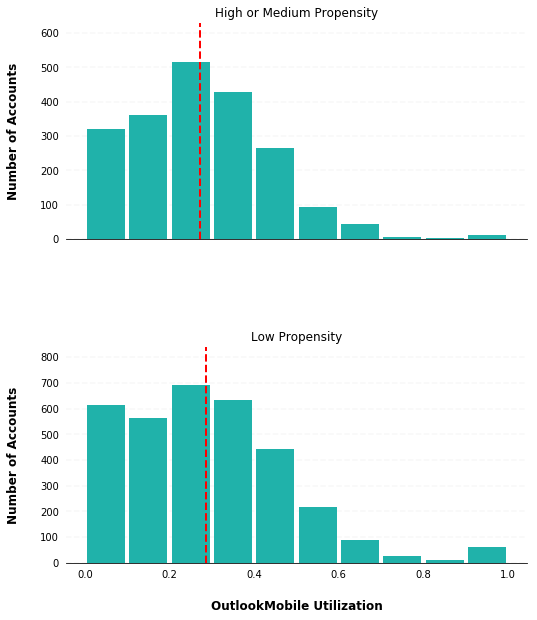

In [115]:
plot_core(df_yg, 'OutlookMobile_MAU_PAU')

In [116]:
def plot_sci(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 2, col_name] = 2
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='Type', bins=21, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 0:
            x.axvline(df[df['Type']=='High or Medium Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='High or Medium Propensity'][col_name].mean())
        if i == 1:
            x.axvline(df[df['Type']=='Low Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='Low Propensity'][col_name].mean())
        
    return ax

0.9825024119872989
1.0131698883461502


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B5AF20F0>,
      dtype=object)

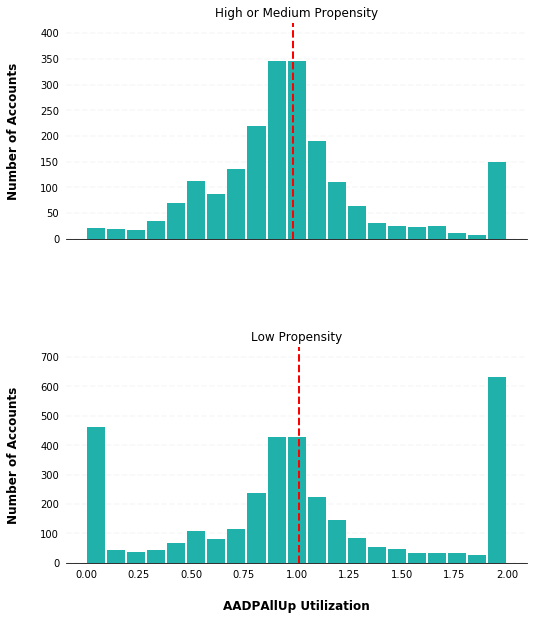

In [119]:
plot_sci(df_yg, 'AADPAllUp_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.5922884188412307
0.3144471913234939


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182A06AC860>,
      dtype=object)

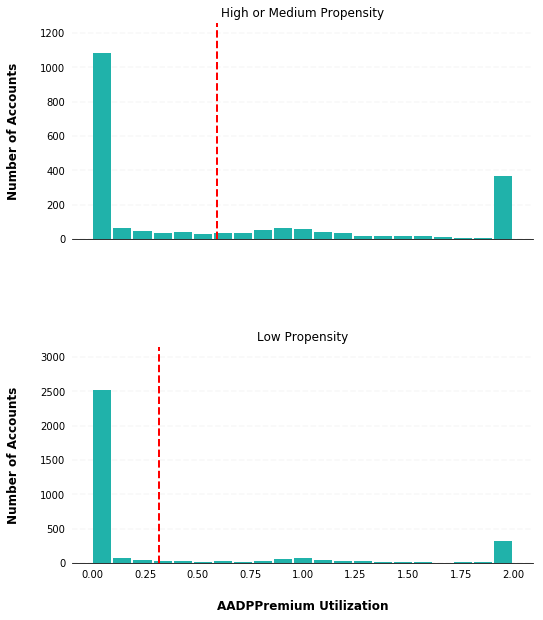

In [118]:
plot_sci(df_yg, 'AADPPremium_MAU_PAU')

0.498057679757694
0.3917423482564107


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B5DEC908>,
      dtype=object)

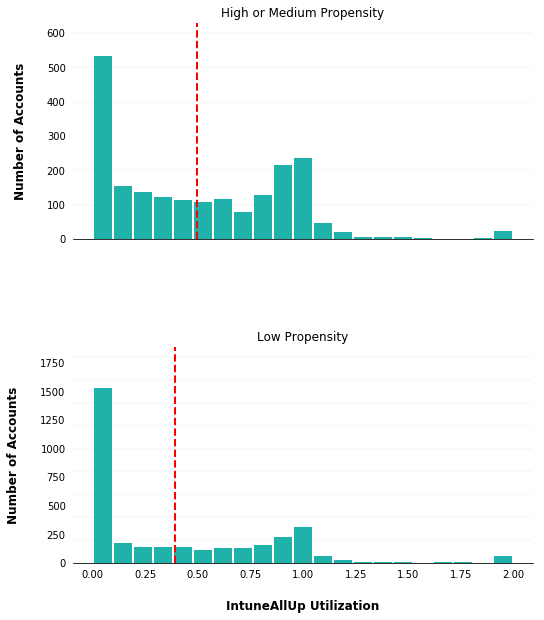

In [120]:
plot_sci(df_yg, 'IntuneAllUp_MAU_PAU')

0.8322817462848059
0.7830800323780567


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B5DECB00>,
      dtype=object)

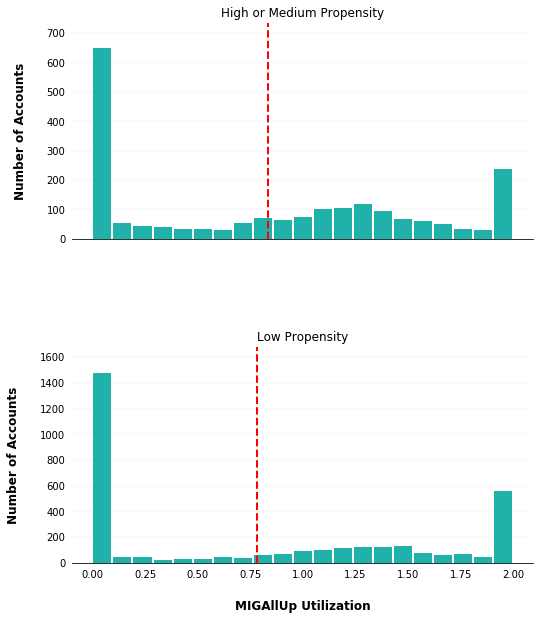

In [121]:
plot_sci(df_yg, 'MIGAllUp_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.24447328340449417
0.09977785272570062


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B5835208>,
      dtype=object)

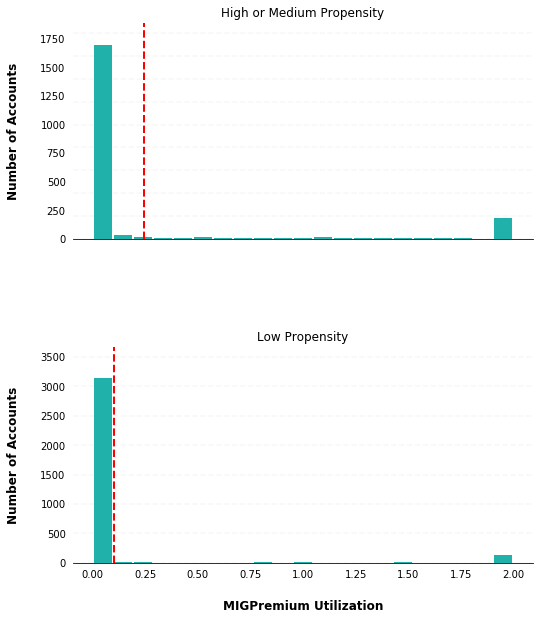

In [122]:
plot_sci(df_yg, 'MIGPremium_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.3726713843722529
0.3912852949624333


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B6224668>,
      dtype=object)

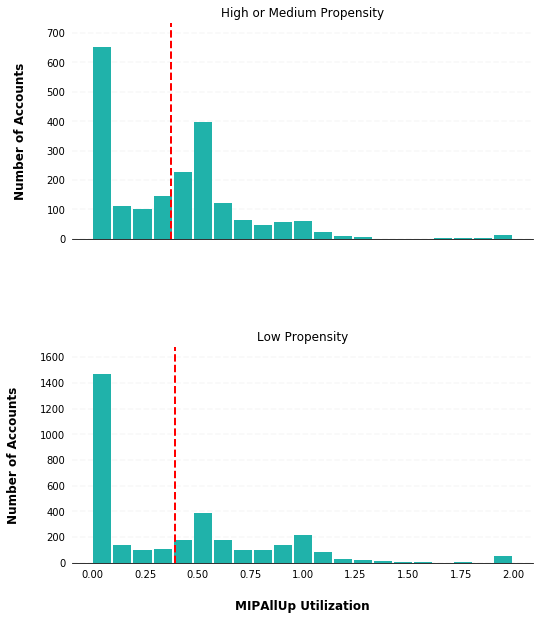

In [123]:
plot_sci(df_yg, 'MIPAllUp_MAU_PAU')

0.4594516098309721
0.21990811260316045


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B800A128>,
      dtype=object)

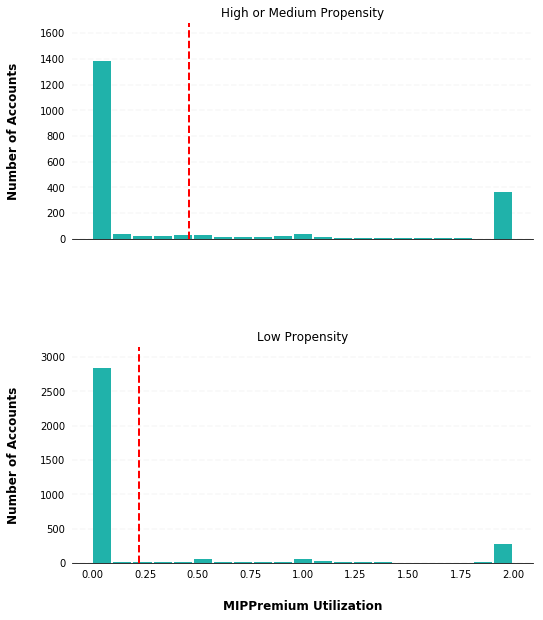

In [124]:
plot_sci(df_yg, 'MIPPremium_MAU_PAU')

C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.8547816415749867
0.6591723563306511


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B83C1710>,
      dtype=object)

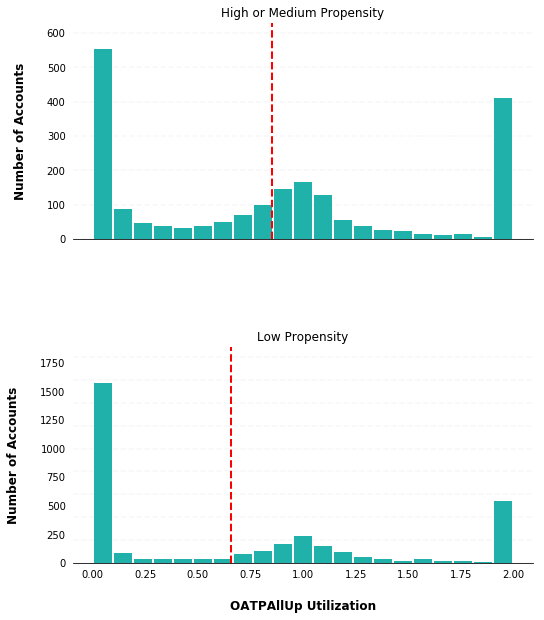

In [125]:
plot_sci(df_yg, 'OATPAllUp_MAU_PAU')

0.9546875847059116
0.5998303218983312


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182B871E358>,
      dtype=object)

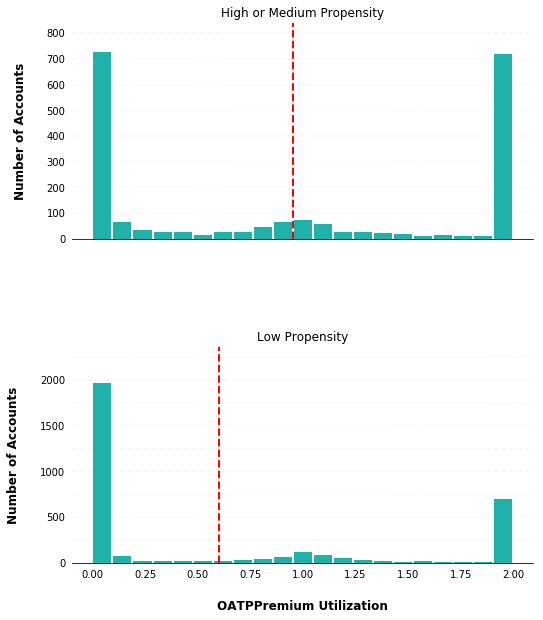

In [126]:
plot_sci(df_yg, 'OATPPremium_MAU_PAU')

0.4543127286555934
0.21634732315563499


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182C6A38CC0>,
      dtype=object)

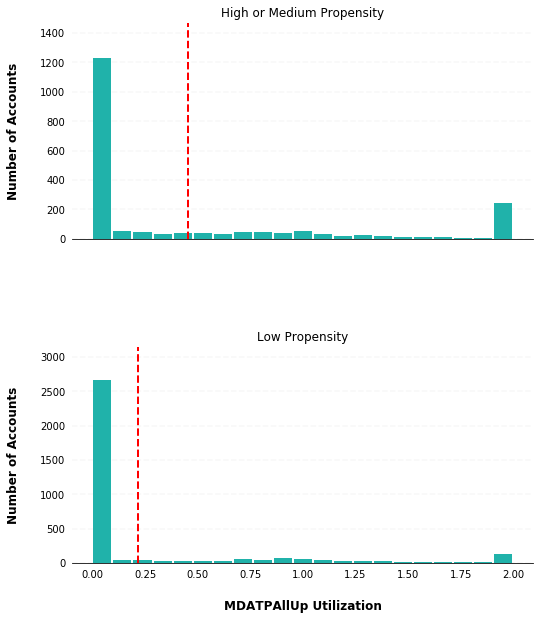

In [127]:
plot_sci(df_yg, 'MDATPAllUp_MAU_PAU')

0.89279418347533
0.4678556866615981


C:\Users\varamase\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000182C748FC88>,
      dtype=object)

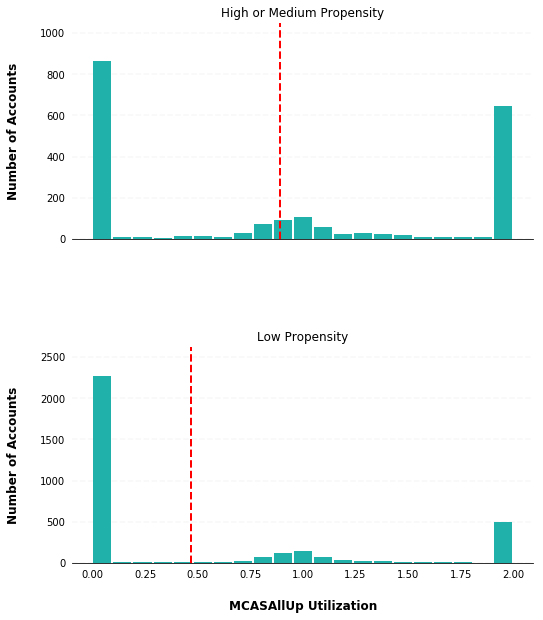

In [128]:
plot_sci(df_yg, 'MCASAllUp_MAU_PAU')